### Positional Encoding
Sabemos colocar as palavras em um espaço de dimensão usando embeddings no entanto não estamos levando em conta a ordem da sequencia. Por exemplo: "Isso, não foi legal" ou "Não, isso foi legal" possuem as mesmas palavras mas em ordem diferentes. A ordem importa em um problema de linguagem e é isso que o positional encoding trás para o embedding de palavras "tokens". O positional encodign usa funções `seno` (par) e `cossenos` (impar?) para por meio de frequencia saber onde aquela palavra está na sequencia.

In [17]:
import torch
import torch.nn as nn
import math
from torch import Tensor
import matplotlib.pyplot as plt

In [2]:
texto = 'Olá mundo'
texto_tokenized = texto.split()

In [3]:
texto_tokenized = [i for i, v in enumerate(texto_tokenized)]
texto_tokenized

[0, 1]

In [4]:
vocab_size = 2
embedding_dim = 2

In [5]:
embedding_layer = nn.Embedding(vocab_size, embedding_dim)
embedding_layer

Embedding(2, 2)

In [6]:
texto_tokenized = torch.tensor(texto_tokenized)
embedded_sequence = embedding_layer(texto_tokenized)

In [7]:
print(f'representação do Olá: {embedded_sequence[0]}')
print(f'representação do mundo: {embedded_sequence[1]}')

representação do Olá: tensor([-0.9345, -0.6243], grad_fn=<SelectBackward0>)
representação do mundo: tensor([ 0.0252, -0.3341], grad_fn=<SelectBackward0>)


In [8]:
embedded_sequence[:, 0].detach().numpy()

array([-0.93446875,  0.02520599], dtype=float32)

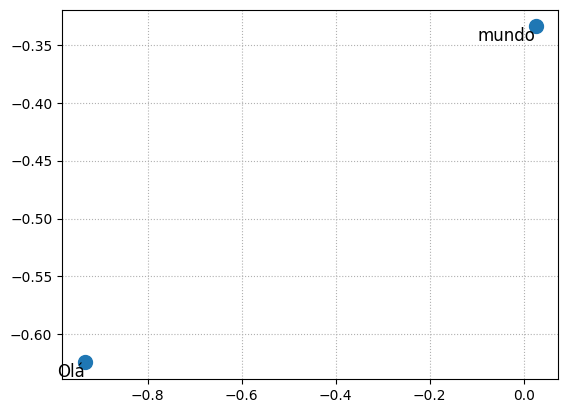

In [11]:
X = embedded_sequence.detach().numpy()
plt.scatter(x=X[:, 0], y=X[:, 1], s=100)
plt.grid(True, linestyle=':')

for i, texto in enumerate(['Olá', 'mundo']):
    plt.annotate(texto, (X[i, 0], X[i, 1]), fontsize=12, color='k', ha='right', va='top')
plt.show()

In [27]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.0, max_len: int = 1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:
        """
        Arguments:
            x: Tensor, shape ``[seq_len, batch_size, embedding_dim]``
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

In [32]:
positional_encoding = PositionalEncoding(d_model=2)

In [33]:
positional_embedded = positional_encoding(embedded_sequence)

In [34]:
embedded_sequence

tensor([[-0.9345, -0.6243],
        [ 0.0252, -0.3341]], grad_fn=<EmbeddingBackward0>)

In [42]:
positional_embedded.detach()[0]

tensor([[-0.9345,  0.3757],
        [ 0.0252,  0.6659]])

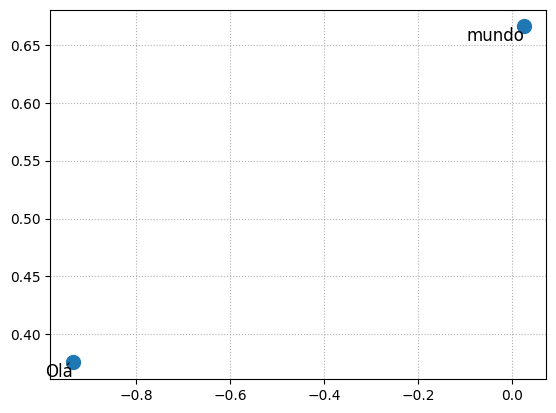

In [44]:
X = positional_embedded.detach()[0].numpy()
plt.scatter(x=X[:, 0], y=X[:, 1], s=100)
plt.grid(True, linestyle=':')

for i, texto in enumerate(['Olá', 'mundo']):
    plt.annotate(texto, (X[i, 0], X[i, 1]), fontsize=12, color='k', ha='right', va='top')
plt.show()